# Building a model to predict housing values in Boston suburbs using multiple linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sns

In [2]:
# Reading Boston dataset
bd=pd.read_csv("boston.csv")

In [3]:
# To check the dataset
bd.shape

(506, 10)

In [4]:
bd.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
0,0.00632,2.31,0.538,6.575,65.199997,4.0900,296,15.300000,396.899994,24.000000
1,0.02731,7.07,0.469,6.421,78.900002,4.9671,242,17.799999,396.899994,21.600000
2,0.02729,7.07,0.469,7.185,61.099998,4.9671,242,17.799999,392.829987,34.700001
3,0.03237,2.18,0.458,6.998,45.799999,6.0622,222,18.700001,394.630005,33.400002
4,0.06905,2.18,0.458,7.147,54.200001,6.0622,222,18.700001,396.899994,36.200001


In [5]:
bd.isnull().sum()

CRIM     0
INDUS    0
NOX      0
RM       0
AGE      0
DIS      0
TAX      0
PT       0
B        0
MV       0
dtype: int64

In [6]:
bd.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674030,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148862,2.105710,168.537116,2.164946,91.294863,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377487,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440002,21.200001
75%,3.677083,18.100000,0.624000,6.623500,94.074999,5.188425,666.000000,20.200001,396.225006,25.000000
max,88.976196,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.899994,50.000000


In [7]:
bd.dtypes

CRIM     float64
INDUS    float64
NOX      float64
RM       float64
AGE      float64
DIS      float64
TAX        int64
PT       float64
B        float64
MV       float64
dtype: object

In [8]:
bd['TAX'].nunique()


66

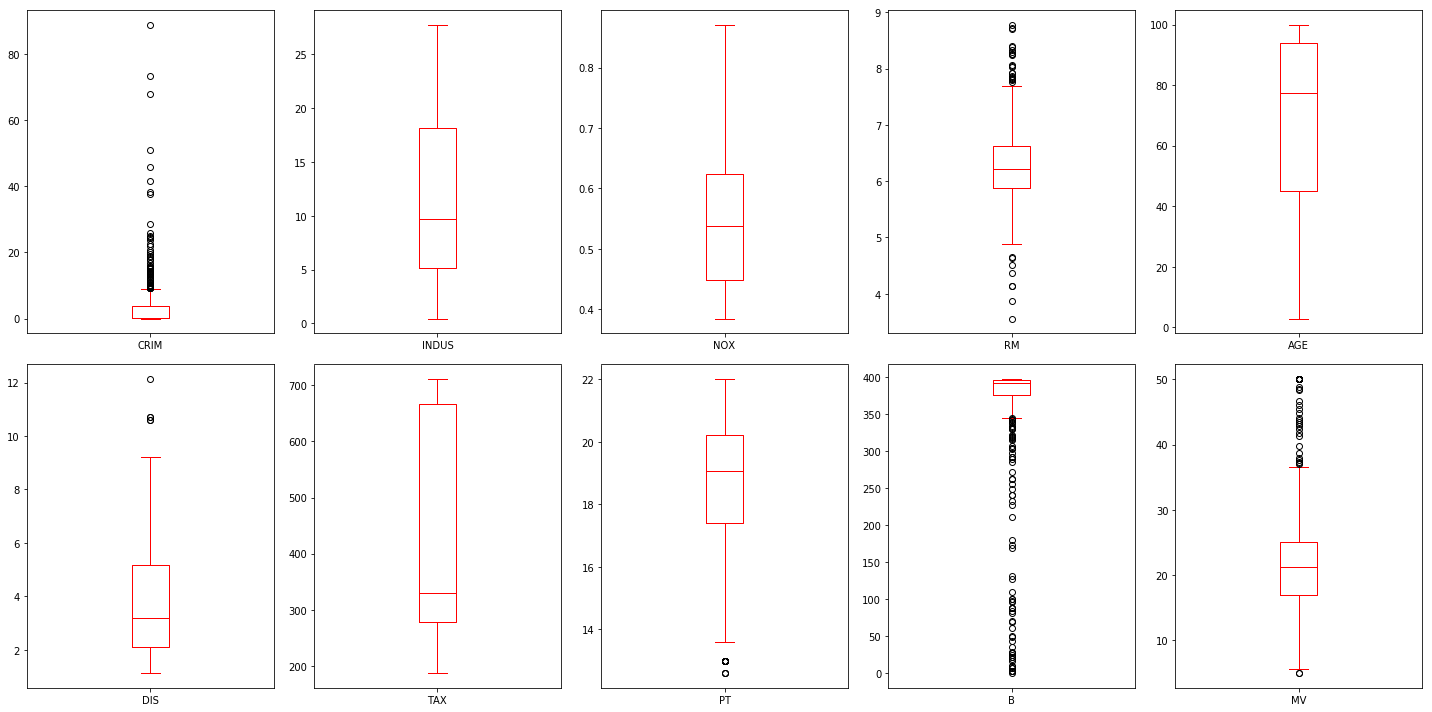

In [9]:
# To check for outliers
bd.plot(kind='box',color='Red',subplots=True,layout=(2,5),sharex=False,figsize=(20,10))
mpl.tight_layout()
mpl.show()

C:\Users\Prabha\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


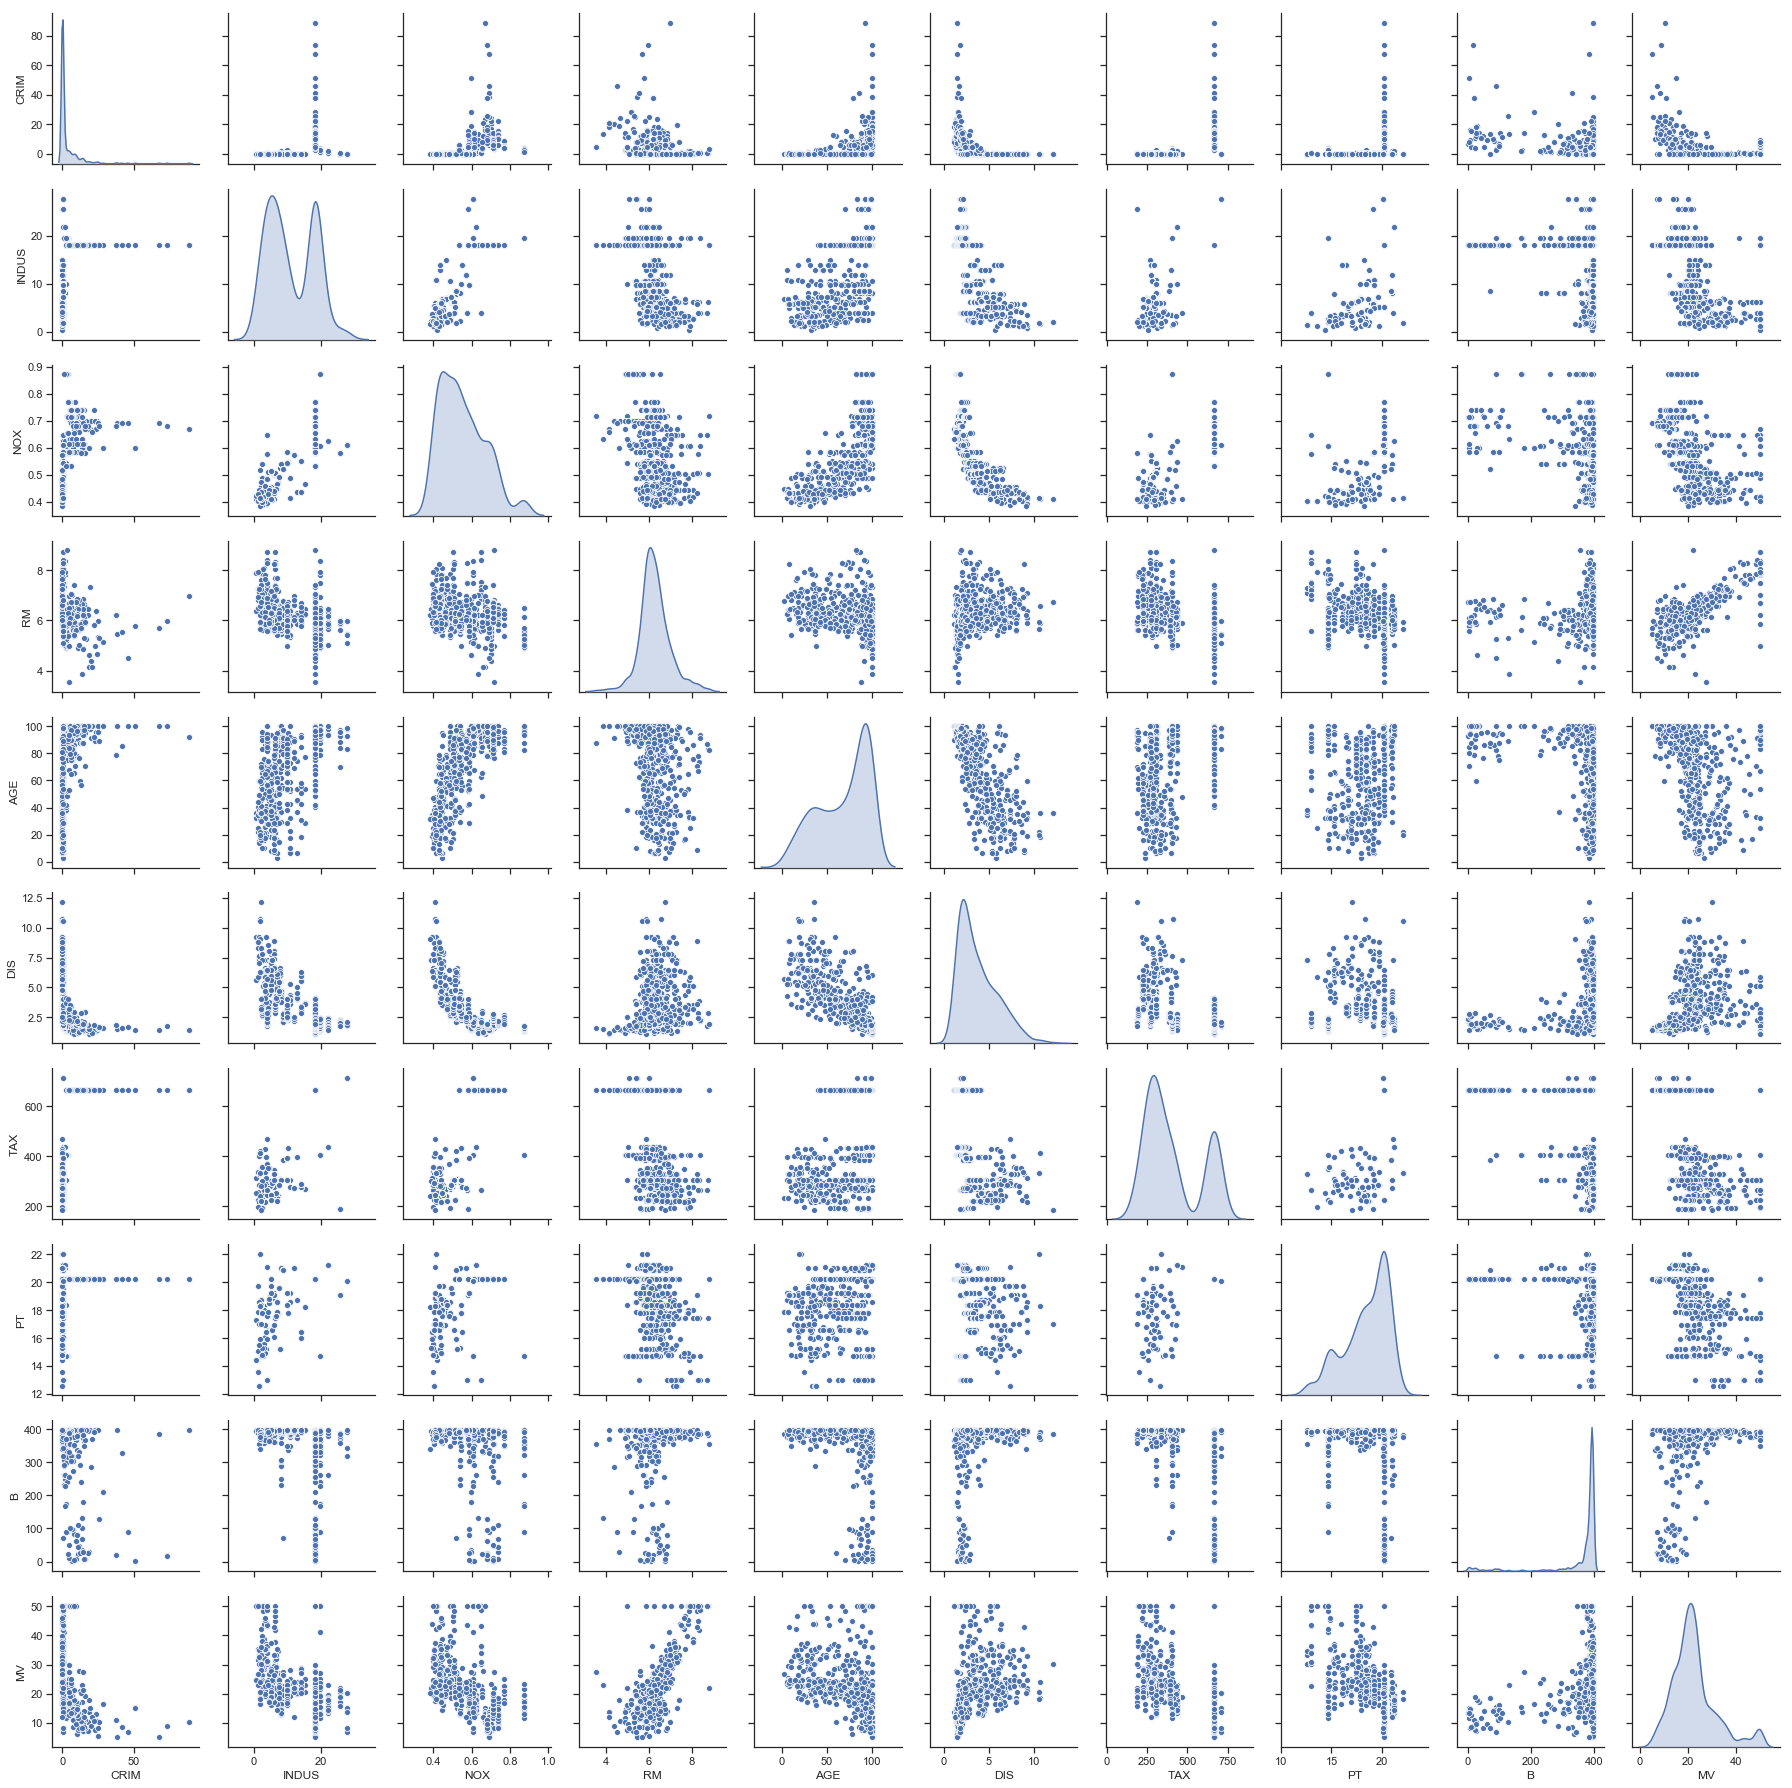

In [10]:
    # To check the linearity relationship
    sns.set(style="ticks")
    sns.pairplot(bd, diag_kind = 'kde')  
                             

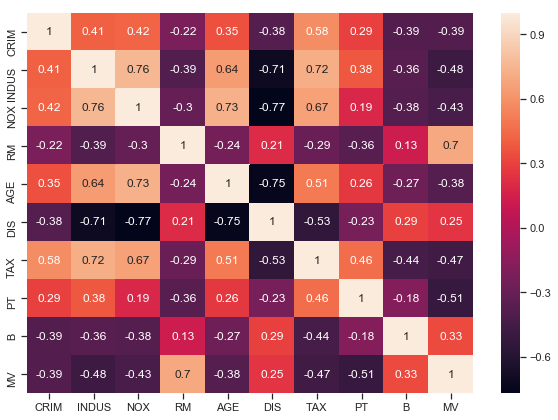

In [11]:
# To check correlation
fig, ax = mpl.subplots(figsize=(10,7))
sns.heatmap(bd.corr(),annot=True,ax=ax,xticklabels=bd.columns, yticklabels=bd.columns)

## Build a model using Multiple Linear Regression with all variables using the Stats package 

In [12]:
import statsmodels.api as sm

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(bd.drop("MV", axis=1), bd['MV'], test_size = 0.3,\
                                                    random_state=111)

In [15]:
X_train = sm.add_constant(X_train)

In [16]:
bdmodel = sm.OLS(Y_train, X_train).fit()

In [17]:
print(bdmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     76.43
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           1.28e-76
Time:                        10:23:09   Log-Likelihood:                -1078.6
No. Observations:                 354   AIC:                             2177.
Df Residuals:                     344   BIC:                             2216.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6461      6.045      1.927      0.0

# Observations
* From the model results we see that the the parameter for TAX is not significantly different from zero at 5% significance level.
(because the confidence interval for its coefficient includes zero and the p-value is very high than the significance level of 0.05). Hence we can conclude that TAX doesnt play a significant role in determining the Median Value Value of the homes.
* Though the parameter for INDUS is also not significantly different from zero at 5% significance level, at this stage we only drop the variable TAX and run the regression model with the variable INDUS included. 
* The parameters for the remaining variables are significantly different from zero at 5% significance level.
* Out of the remaining variables, the variables B(proportion of blacks) and RM(rooms per dwelling) are positively correlated to MV(Median value of owner occupied homes) and the rest of the variables are negatively correlated with MV.

In [18]:
X_train = X_train.drop("TAX",axis=1)

In [19]:
bdmodel1 = sm.OLS(Y_train, X_train).fit()

In [20]:
print(bdmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     86.24
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           1.34e-77
Time:                        10:23:10   Log-Likelihood:                -1078.6
No. Observations:                 354   AIC:                             2175.
Df Residuals:                     345   BIC:                             2210.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5617      5.892      1.962      0.0

## Observations
* We notice that Adjusted R^2 has increased though only by a small ampount. This shows that the variable TAX which was dropped is not relevant in predicting the median value of the homes.

* From the model results we see that the the parameter for INDUS is not significantly different from zero at 5% significance level.(because the confidence interval for its coefficient includes zero and the p-value is very high than the significance level of 0.05)
Hence we can conclude that variable INDUS doesnt play a significant role in determining the Median Value Value of the homes. Hence we will drop the variable INDUS and rerun the regression model.
* The parameters for the remaining variables are significantly different from zero at 5% significance level.
* Out of the remaining variables, the variables B(proportion of blacks) and RM(rooms per dwelling) are positively correlated to MV(Median value of owner occupied homes) and the rest of the variables are negatively correlated with MV. 


In [21]:
X_train = X_train.drop("INDUS",axis=1)

In [22]:
bdmodel2 = sm.OLS(Y_train, X_train).fit()
print(bdmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     97.83
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           4.22e-78
Time:                        10:23:10   Log-Likelihood:                -1079.8
No. Observations:                 354   AIC:                             2176.
Df Residuals:                     346   BIC:                             2207.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8846      5.900      2.014      0.0

## Observations
* From the model results we see that all the parameters are significantly different from zero at 5% significance level. Hence these variables are significant in predicting the median value of homes.

## To check if this model generalizes well on the test data

In [23]:
X_test.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B
93,0.02875,15.04,0.4640,6.211,28.900000,3.6659,270,18.200001,396.329987
223,0.61470,6.20,0.5070,6.618,80.800003,3.2721,307,17.400000,396.899994
39,0.02763,2.95,0.4280,6.595,21.799999,5.4011,252,18.299999,395.630005
122,0.09299,25.65,0.5810,5.961,92.900002,2.0869,188,19.100000,378.089996
203,0.03510,2.68,0.4161,7.853,33.200001,5.1180,224,14.700000,392.779999


In [24]:
X_test = X_test.drop(["TAX","INDUS"],axis=1)

In [25]:
predictions = bdmodel2.predict(sm.add_constant(X_test))

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(Y_test, predictions)

0.6454050475031539

R^2 value indicates that the model generalizes well on the test data.

# Checking the Validity of Linear Regression Assumptions

# 1.  To check Normal Distribution of error terms:

Text(0.5,0,'Residuals')

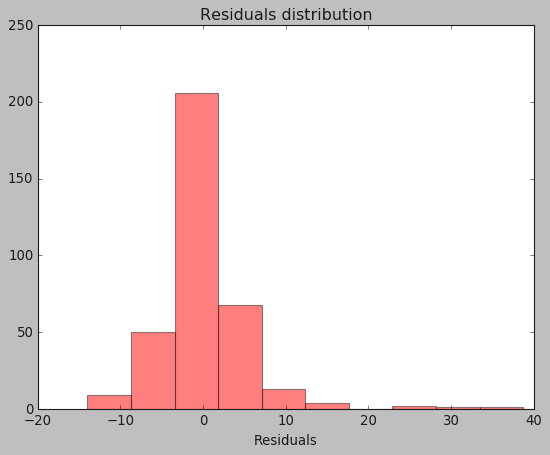

In [28]:
mpl.style.use('classic')
mpl.hist(bdmodel2.resid,bins=10,color='red',alpha=0.5)
mpl.title("Residuals distribution")
mpl.xlabel("Residuals")

* Distribution mostly normal with little right Skew. 

* We will also check QQ plot to verify this skewness.

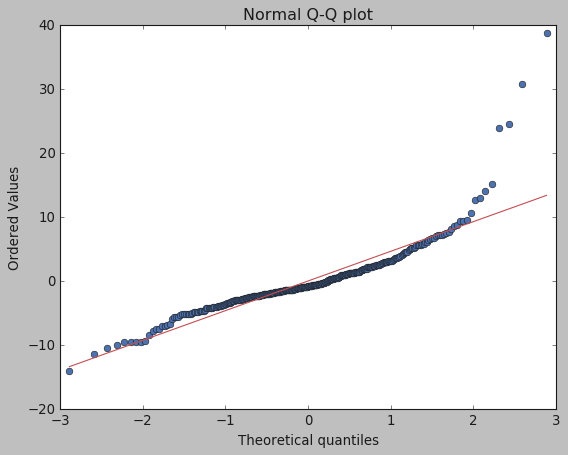

In [29]:
import scipy.stats as stats
stats.probplot(bdmodel2.resid, dist="norm", plot=mpl)
mpl.title("Normal Q-Q plot")
mpl.show()

* At the higher quantiles there is slight departure from normality 

# 2. To check Multicollinearity we calculate Variance inflation factor(VIF)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const    461.135402
CRIM       1.520065
NOX        3.153933
RM         1.186742
AGE        2.429487
DIS        2.782749
PT         1.231702
B          1.369055
dtype: float64

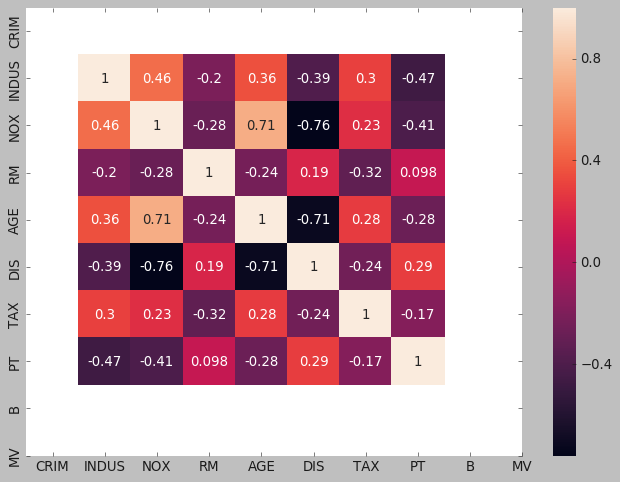

In [31]:
# To check correlation
fig, ax = mpl.subplots(figsize=(10,7))
sns.heatmap(X_train.corr(),annot=True,ax=ax,xticklabels=bd.columns, yticklabels=bd.columns)

# 3. To check the assumption of constant variation

Text(0,0.5,'Residuals')

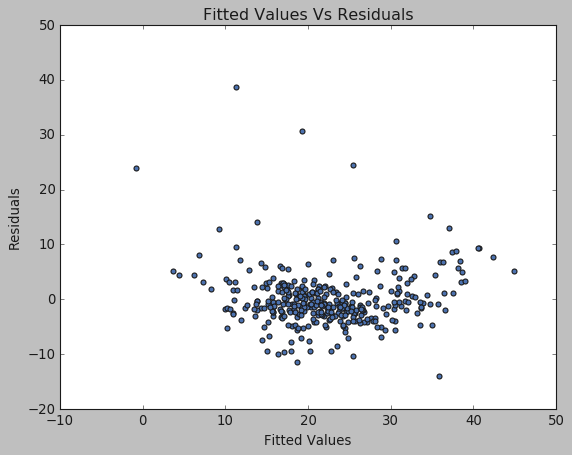

In [32]:
mpl.scatter(bdmodel2.fittedvalues,bdmodel2.resid )
mpl.title("Fitted Values Vs Residuals")
mpl.xlabel("Fitted Values")
mpl.ylabel("Residuals")

The variance seems to be ok however the data appears to have some non linearity.

* As the data slightly diverges from the assumptions of linear regression for normality and linearity we will apply transformations to the data and run the model.

# A. Apply log transformation on the dependent variable Y.

In [33]:
bdmodellogy = sm.OLS(np.log(pd.DataFrame(Y_train)), X_train).fit()

In [34]:
print(bdmodellogy.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     102.0
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           3.67e-80
Time:                        10:23:13   Log-Likelihood:                 21.789
No. Observations:                 354   AIC:                            -27.58
Df Residuals:                     346   BIC:                             3.376
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8197      0.263     10.735      0.0

# Observations
The adjusted R^2 has increased slightly. All the other variables also are significant.
The skewness and kurtosis has reduced.

Text(0.5,0,'Residuals')

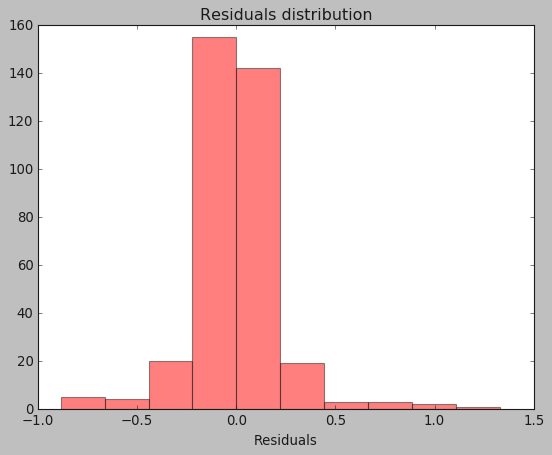

In [35]:
# To check normal distribution
mpl.style.use('classic')
mpl.hist(bdmodellogy.resid,bins=10,color='red',alpha=0.5)
mpl.title("Residuals distribution")
mpl.xlabel("Residuals")

* Skewness visible in higher and lower quantiles as can be seen below.

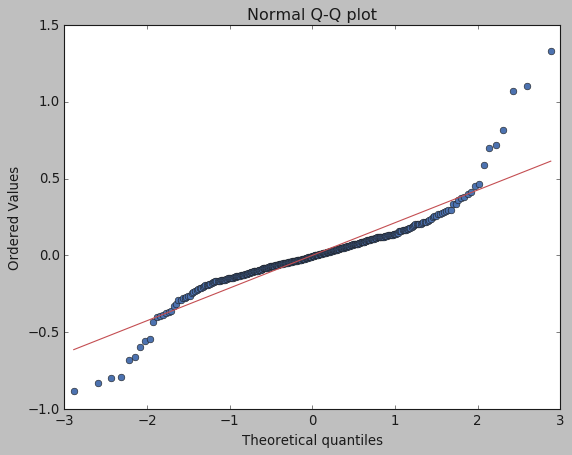

In [36]:
import scipy.stats as stats
stats.probplot(bdmodellogy.resid, dist="norm", plot=mpl)
mpl.title("Normal Q-Q plot")
mpl.show()

Text(0,0.5,'Residuals')

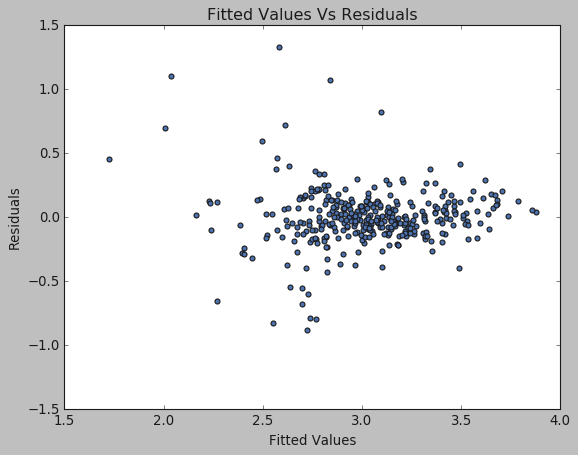

In [37]:
mpl.scatter(bdmodellogy.fittedvalues,bdmodellogy.resid )
mpl.title("Fitted Values Vs Residuals")
mpl.xlabel("Fitted Values")
mpl.ylabel("Residuals")

* Funneling pattern indicating hetroscedasticity.

# B. Apply Squareroot transformation on the dependent variable Y

In [38]:
bdmodelsqrty = sm.OLS(np.sqrt(pd.DataFrame(Y_train)), X_train).fit()
print(bdmodelsqrty.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     105.7
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           5.53e-82
Time:                        10:23:14   Log-Likelihood:                -264.93
No. Observations:                 354   AIC:                             545.9
Df Residuals:                     346   BIC:                             576.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8661      0.590      6.548      0.0

# Observations
The adjusted R^2 has increased slightly. All the other variables are also significant.
The skewness and kurtosis has reduced.

Text(0.5,0,'Residuals')

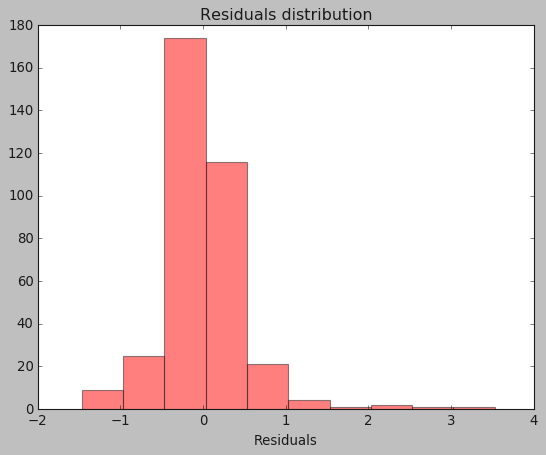

In [39]:
# To check for normality
mpl.style.use('classic')
mpl.hist(bdmodelsqrty.resid,bins=10,color='red',alpha=0.5)
mpl.title("Residuals distribution")
mpl.xlabel("Residuals")

Skewness visible in higher quantiles as can be seen below.

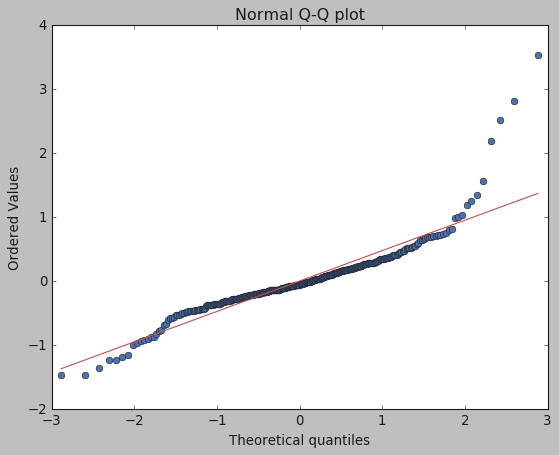

In [40]:
import scipy.stats as stats
stats.probplot(bdmodelsqrty.resid, dist="norm", plot=mpl)
mpl.title("Normal Q-Q plot")
mpl.show()

Text(0,0.5,'Residuals')

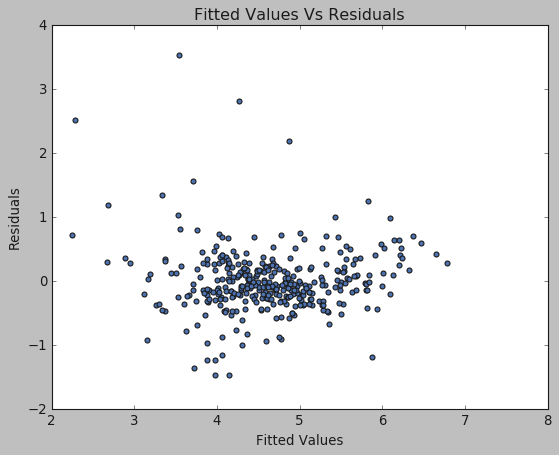

In [41]:
mpl.scatter(bdmodelsqrty.fittedvalues,bdmodelsqrty.resid )
mpl.title("Fitted Values Vs Residuals")
mpl.xlabel("Fitted Values")
mpl.ylabel("Residuals")

* Still some funneling present indicating hetroscedasticity.

# C. Logarithmic transformation of independent variables(X) 

In [42]:
X_trainlog=X_train.applymap(np.log)

In [43]:
X_trainlog.head()

,const,CRIM,NOX,RM,AGE,DIS,PT,B
199,0.0,-3.457768,-0.908819,1.942332,2.727853,2.035150,2.833213,5.983684
101,0.0,-2.168754,-0.653927,1.914125,4.266896,1.049457,3.039749,5.980353
386,0.0,3.194329,-0.356675,1.537297,4.605170,0.383356,3.005683,5.983684
77,0.0,-2.441043,-0.827822,1.814825,3.824284,1.408667,2.928524,5.958321
176,0.0,-2.656122,-0.673345,1.795087,3.854394,1.268327,2.809403,5.974395


In [44]:
X_trainlog['const']=1.0

In [45]:
X_trainlog.head()

,const,CRIM,NOX,RM,AGE,DIS,PT,B
199,1.0,-3.457768,-0.908819,1.942332,2.727853,2.035150,2.833213,5.983684
101,1.0,-2.168754,-0.653927,1.914125,4.266896,1.049457,3.039749,5.980353
386,1.0,3.194329,-0.356675,1.537297,4.605170,0.383356,3.005683,5.983684
77,1.0,-2.441043,-0.827822,1.814825,3.824284,1.408667,2.928524,5.958321
176,1.0,-2.656122,-0.673345,1.795087,3.854394,1.268327,2.809403,5.974395


In [46]:
bdmodellog = sm.OLS(Y_train, X_trainlog).fit()
print(bdmodellog.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     85.29
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           1.81e-71
Time:                        10:23:16   Log-Likelihood:                -1095.6
No. Observations:                 354   AIC:                             2207.
Df Residuals:                     346   BIC:                             2238.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3275     11.181     -0.119      0.9

# Observations
The adjusted R^2 has decreased slightly. CRIM variable appears to be insignificant.
All the other variables are significant.
We will drop the CRIM variable and rerun the model.

In [47]:
X_trainlog1=X_trainlog.drop("CRIM",axis=1)

In [48]:
bdmodellog1 = sm.OLS(Y_train, X_trainlog1).fit()
print(bdmodellog1.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     99.13
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           3.58e-72
Time:                        10:23:17   Log-Likelihood:                -1096.3
No. Observations:                 354   AIC:                             2207.
Df Residuals:                     347   BIC:                             2234.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7646     11.178     -0.068      0.9

# Observations
Even after dropping the variable the adjusted R^2 has not improved.
All the other variables are significant.

Text(0.5,0,'Residuals')

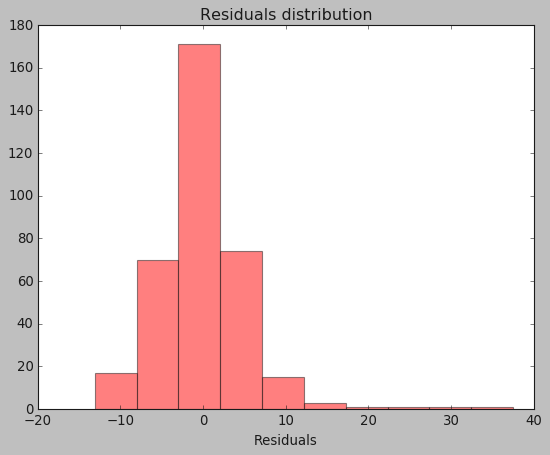

In [49]:
mpl.style.use('classic')
mpl.hist(bdmodellog1.resid,bins=10,color='red',alpha=0.5)
mpl.title("Residuals distribution")
mpl.xlabel("Residuals")

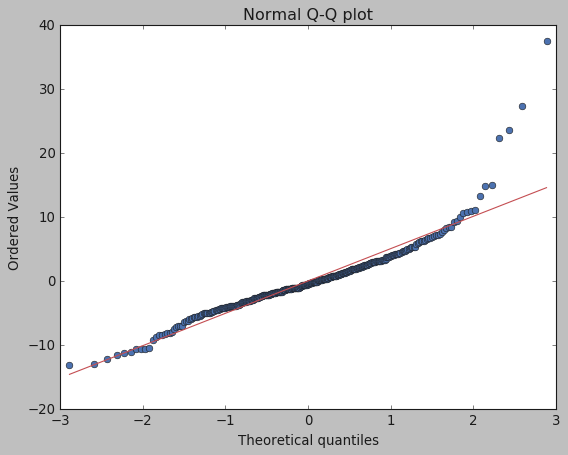

In [50]:
import scipy.stats as stats
stats.probplot(bdmodellog1.resid, dist="norm", plot=mpl)
mpl.title("Normal Q-Q plot")
mpl.show()

Text(0,0.5,'Residuals')

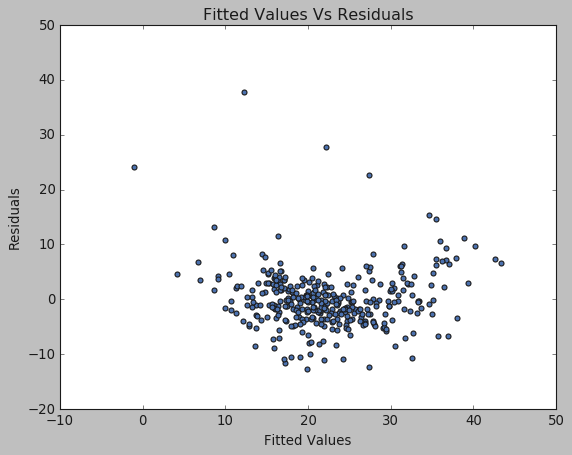

In [51]:
mpl.scatter(bdmodellog.fittedvalues,bdmodellog.resid )
mpl.title("Fitted Values Vs Residuals")
mpl.xlabel("Fitted Values")
mpl.ylabel("Residuals")

* No improvement in normality or nonlinearity as we can see a shape in the plot.

# D. Squareroot transformation of independent variables (X)

In [52]:
X_trainsqrt=X_train.applymap(np.sqrt)

In [53]:
X_trainsqrt.head()

,const,CRIM,NOX,RM,AGE,DIS,PT,B
199,1.0,0.177482,0.634823,2.641023,3.911521,2.766478,4.123106,19.922349
101,1.0,0.338112,0.721110,2.604035,8.443933,1.690000,4.571652,19.889193
386,1.0,4.939008,0.836660,2.156850,10.000000,1.211280,4.494441,19.922349
77,1.0,0.295076,0.661060,2.477902,6.767570,2.022498,4.324350,19.671299
176,1.0,0.264991,0.714143,2.453569,6.870226,1.885444,4.074310,19.830028


In [54]:
bdmodelsqrt = sm.OLS(Y_train, X_trainsqrt).fit()
print(bdmodelsqrt.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     94.51
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           2.11e-76
Time:                        10:23:18   Log-Likelihood:                -1083.9
No. Observations:                 354   AIC:                             2184.
Df Residuals:                     346   BIC:                             2215.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5071     12.202      0.779      0.4

# Observations
The adjusted R^2 has decreased slightly.
All the other variables are significant.

Text(0.5,0,'Residuals')

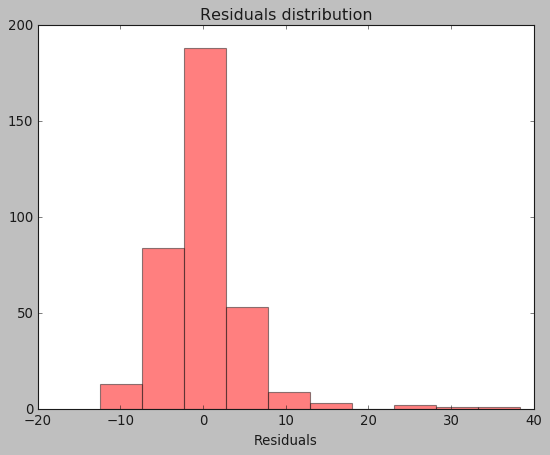

In [55]:
mpl.style.use('classic')
mpl.hist(bdmodelsqrt.resid,bins=10,color='red',alpha=0.5)
mpl.title("Residuals distribution")
mpl.xlabel("Residuals")

* Skewness still present in data at higher quantiles.

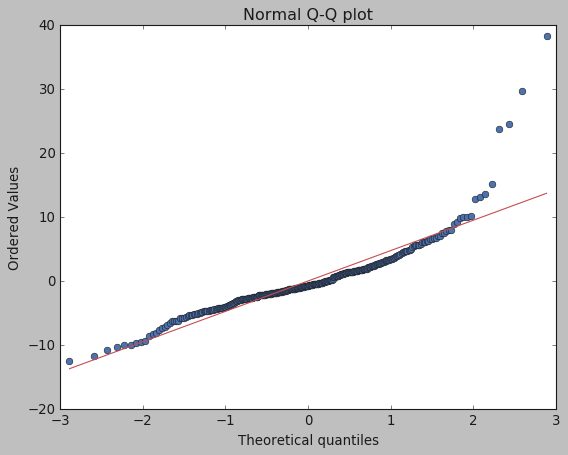

In [56]:
import scipy.stats as stats
stats.probplot(bdmodelsqrt.resid, dist="norm", plot=mpl)
mpl.title("Normal Q-Q plot")
mpl.show()

Text(0,0.5,'Residuals')

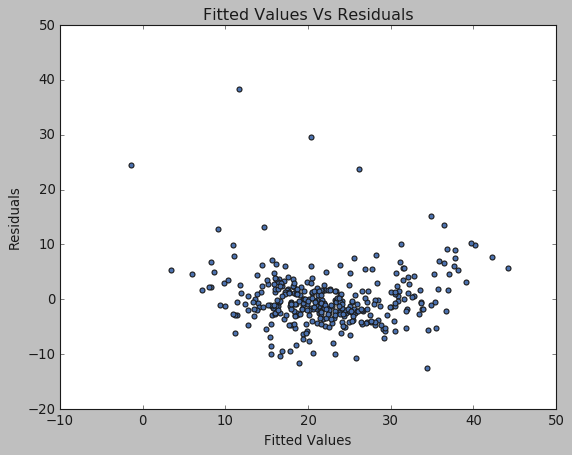

In [57]:
mpl.scatter(bdmodelsqrt.fittedvalues,bdmodelsqrt.resid )
mpl.title("Fitted Values Vs Residuals")
mpl.xlabel("Fitted Values")
mpl.ylabel("Residuals")

* Non linearity still present.

# E. Square transformation of independent variables (X)

In [58]:
X_trainsquare=X_train.applymap(np.square)

In [59]:
X_trainsquare.head()

,const,CRIM,NOX,RM,AGE,DIS,PT,B
199,1.0,0.000992,0.162409,48.650624,234.090006,58.574531,289.000000,157529.605158
101,1.0,0.013069,0.270400,45.981963,5083.690435,8.157308,436.809984,156483.525798
386,1.0,595.057515,0.490000,21.641104,10000.000000,2.152676,408.040031,157529.605158
77,1.0,0.007581,0.190969,37.699598,2097.639930,16.732189,349.690028,149738.035022
176,1.0,0.004931,0.260100,36.240400,2227.840072,12.637314,275.560013,154629.841551


In [60]:
bdmodelsquare = sm.OLS(Y_train, X_trainsquare).fit()
print(bdmodelsquare.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     98.11
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           3.05e-78
Time:                        10:23:20   Log-Likelihood:                -1079.5
No. Observations:                 354   AIC:                             2175.
Df Residuals:                     346   BIC:                             2206.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2295      2.969      4.455      0.0

# Observations
The adjusted R^2 has decreased slightly. CRIM variable appears to be insignificant.
All the other variables are significant.
We will drop the CRIM variable and rerun the model.

In [61]:
bdmodelsquare1 = sm.OLS(Y_train, X_trainsquare.drop(["CRIM"],axis=1)).fit()
print(bdmodelsquare1.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     113.7
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           7.91e-79
Time:                        10:23:20   Log-Likelihood:                -1080.6
No. Observations:                 354   AIC:                             2175.
Df Residuals:                     347   BIC:                             2202.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8521      2.963      4.338      0.0

# Observation
No improvement in adjusted R^2.

Text(0.5,0,'Residuals')

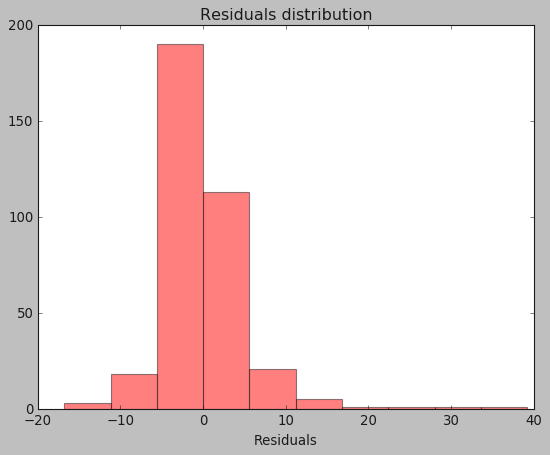

In [62]:
mpl.style.use('classic')
mpl.hist(bdmodelsquare1.resid,bins=10,color='red',alpha=0.5)
mpl.title("Residuals distribution")
mpl.xlabel("Residuals")

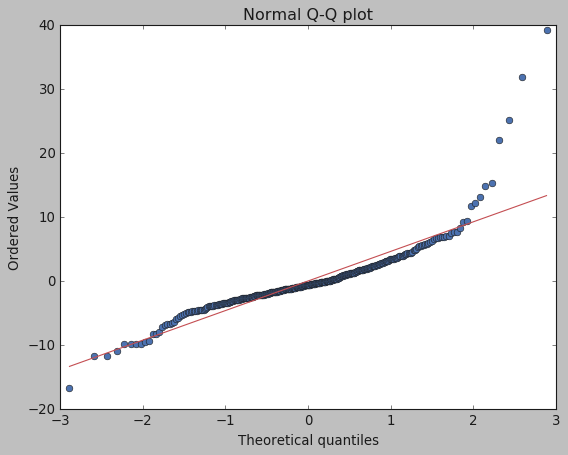

In [63]:
import scipy.stats as stats
stats.probplot(bdmodelsquare1.resid, dist="norm", plot=mpl)
mpl.title("Normal Q-Q plot")
mpl.show()

Text(0,0.5,'Residuals')

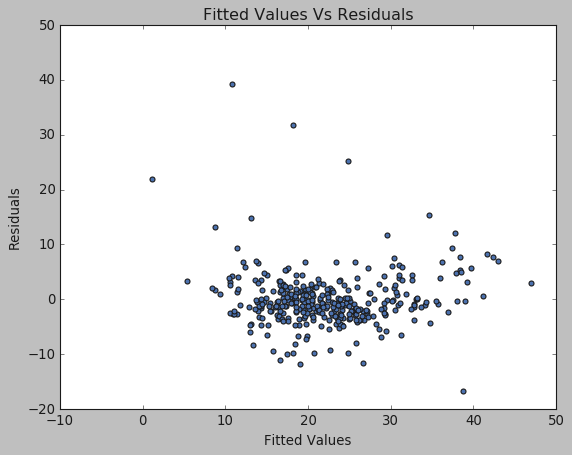

In [64]:
mpl.scatter(bdmodelsquare1.fittedvalues,bdmodelsquare1.resid )
mpl.title("Fitted Values Vs Residuals")
mpl.xlabel("Fitted Values")
mpl.ylabel("Residuals")

* Nonlinearity still present.

## Conclusion


### * bdmodel12 with adjusted R^2 value of 0.658 (that is the model after dropping the TAX and INDUS variables without any transformations) seems to be the best fitted model for the given data.
* Though the model where dependent variable Y has been sqrt transformed shows a slight improvement in adjusted R^2 (0.675) it shows higher deviation from normality and suffers from hetroscedasticity. 